In [10]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [11]:
# Define dataset paths
base_dir = 'images'  # Make sure this matches the base directory containing 'train', 'validation', 'test'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [12]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Initialize the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 252 images belonging to 9 classes.


In [14]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 54 images belonging to 9 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 54 images belonging to 9 classes.


In [16]:
# Print generator info to debug
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")


Training samples: 252
Validation samples: 54
Test samples: 54


In [17]:
# Ensure that the generators have data
assert train_generator.samples > 0, "No training samples found."
assert validation_generator.samples > 0, "No validation samples found."
assert test_generator.samples > 0, "No test samples found."


In [18]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model with validation data in a separate fit call to isolate the issue
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25
)

Epoch 1/25


c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 675ms/step - accuracy: 0.1360 - loss: 2.6263
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0312 - loss: 2.2919  
Epoch 3/25


c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 657ms/step - accuracy: 0.2996 - loss: 1.9712
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1562 - loss: 1.8787  
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 655ms/step - accuracy: 0.3973 - loss: 1.6699
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3750 - loss: 1.7431  
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 645ms/step - accuracy: 0.3971 - loss: 1.5896
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step - accuracy: 0.3438 - loss: 1.8226
Epoch 9/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 668ms/step - accuracy: 0.4560 - loss: 1.4276
Epoch 10/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6786 - loss: 1.0575  
Epoch 11/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 650ms/step - accuracy: 0.4012 - loss: 1.5427
Epoch 12/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 1.2994  
Epoch 13/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 659ms/step - accuracy: 0.4704 - loss: 1.3753
Epoch 14/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5312 - loss: 1

In [21]:
# Validate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - accuracy: 0.6262 - loss: 1.1685
Validation Accuracy: 61.11%


In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 485ms/step - accuracy: 0.5930 - loss: 1.1303
Test Accuracy: 59.26%


In [23]:
# Save the model
model.save('custom_image_classifier.h5')

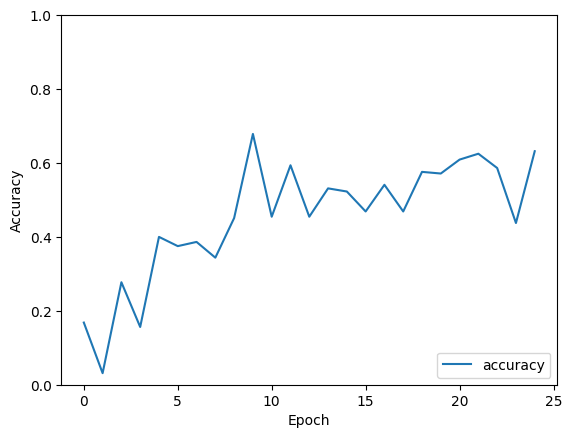

In [24]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
